In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as ex

In [2]:
sonar_df= pd.read_csv('sonar.csv', header= None)

In [3]:
sonar_df.shape

(208, 61)

In [4]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
target_col= sonar_df.iloc[:, -1].replace({'R':0, 'M':1})

C:\Users\ravad\AppData\Local\Temp\ipykernel_20360\245247297.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_col= sonar_df.iloc[:, -1].replace({'R':0, 'M':1})


In [7]:
print(target_col)

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64


In [8]:
target_detais= sonar_df.iloc[:, -1].value_counts()

In [9]:
target_detais

60
M    111
R     97
Name: count, dtype: int64

In [10]:
dict_target= target_detais.to_dict()
print(dict_target)

{'M': 111, 'R': 97}


In [11]:
tar_key_list= dict_target.keys()
tar_val_list= dict_target.values()

In [12]:
fig= ex.bar(x= tar_key_list, y= tar_val_list, title= 'target variables bar plot')
fig.update_layout(height= 500, width= 500)
fig.show()

C:\Users\ravad\AppData\Local\Temp\ipykernel_20360\3329563819.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ravad\AppData\Local\Temp\ipykernel_20360\3329563819.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ravad\AppData\Local\Temp\ipykernel_20360\3329563819.py:4: UserWarning:



`distplot` is

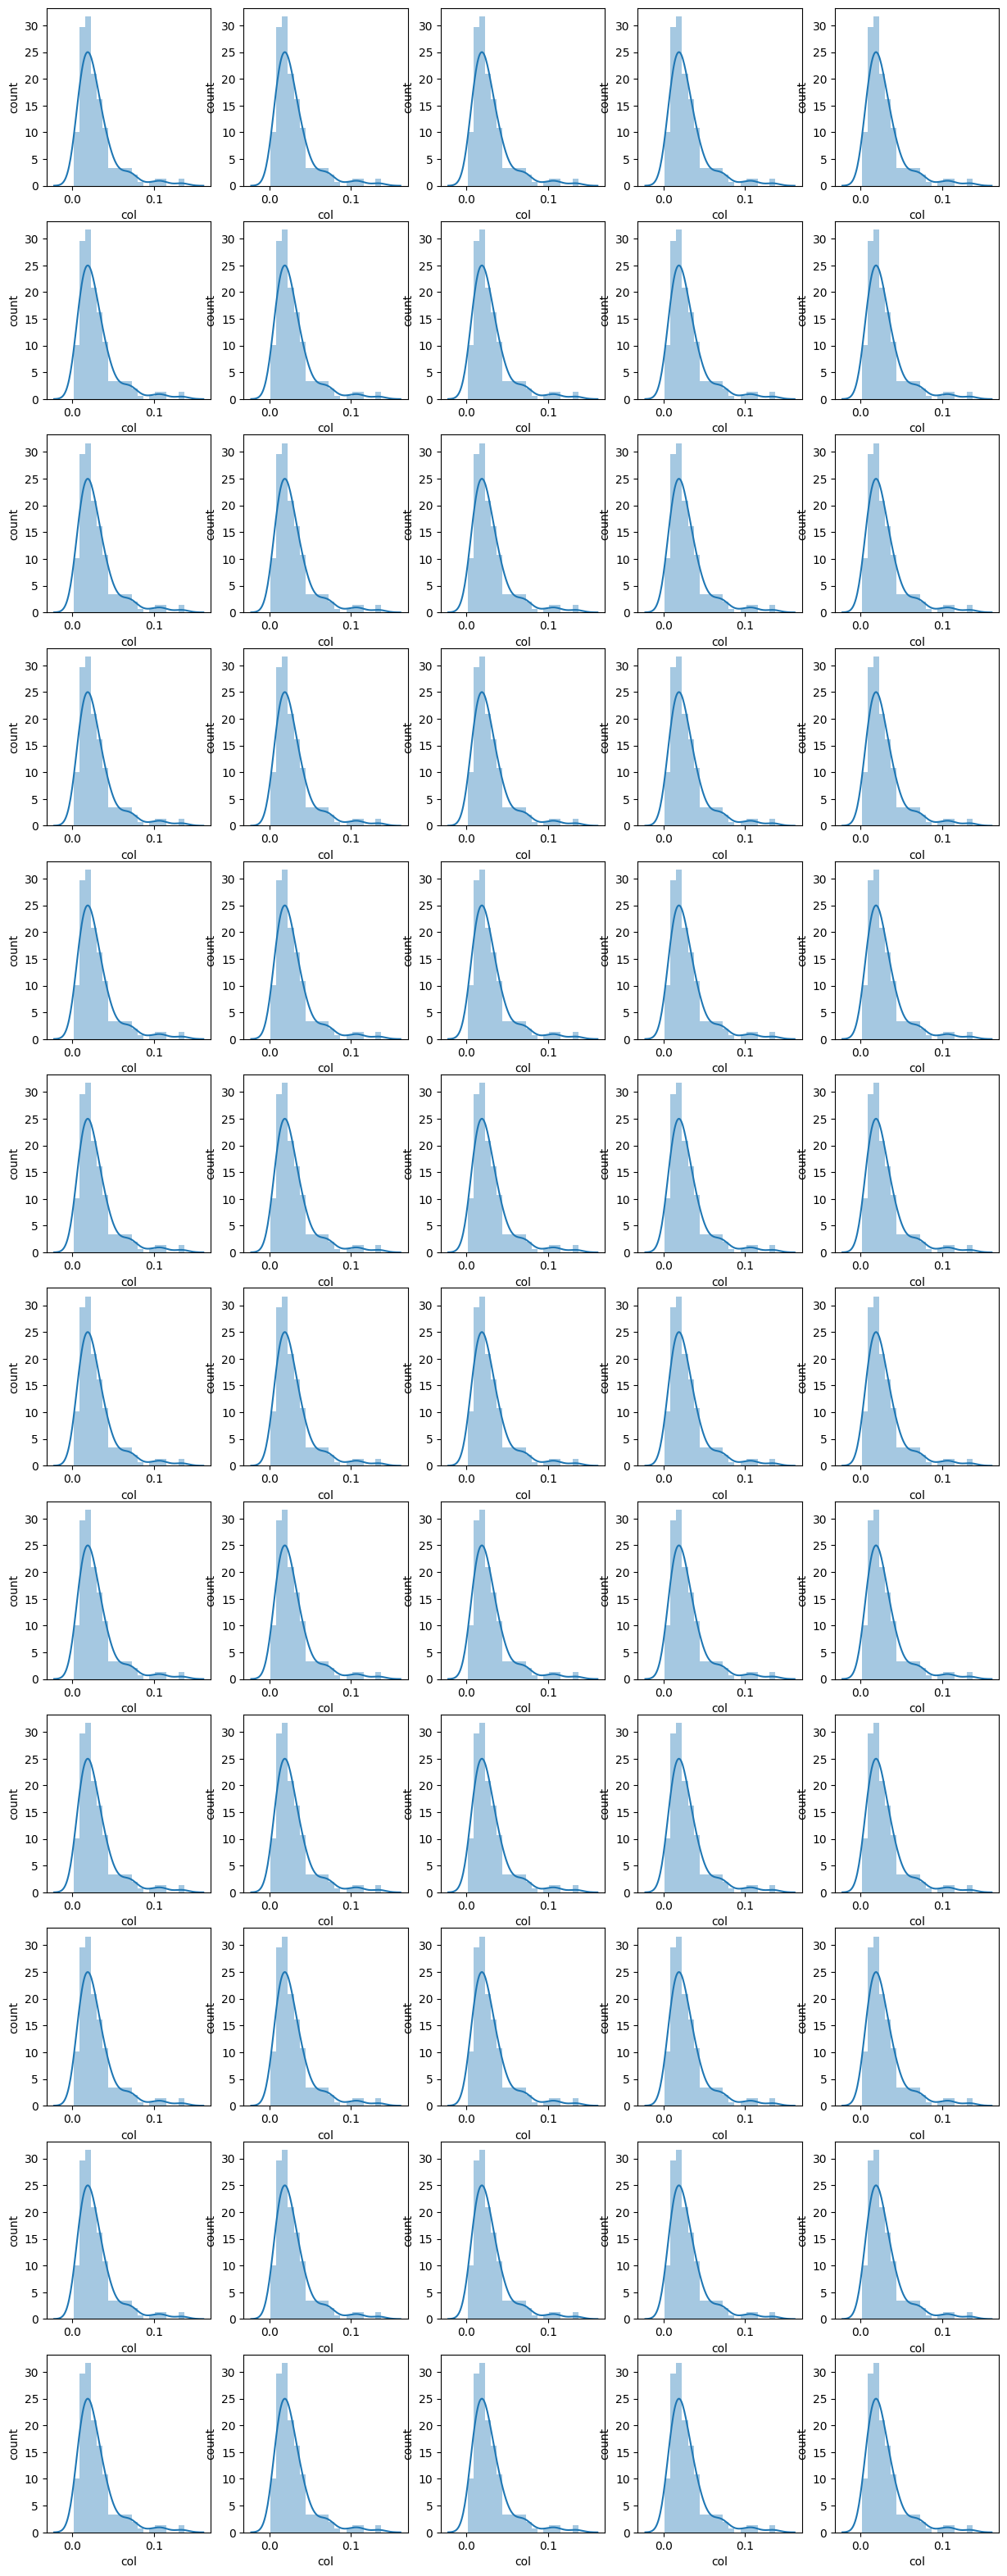

In [13]:
plt.figure(figsize=(15, 40))
for i in range(0, 60):
    plt.subplot(12, 5, i+1)
    sns.distplot(sonar_df.iloc[:, 0] )
    plt.xlabel('col')
    plt.ylabel('count')


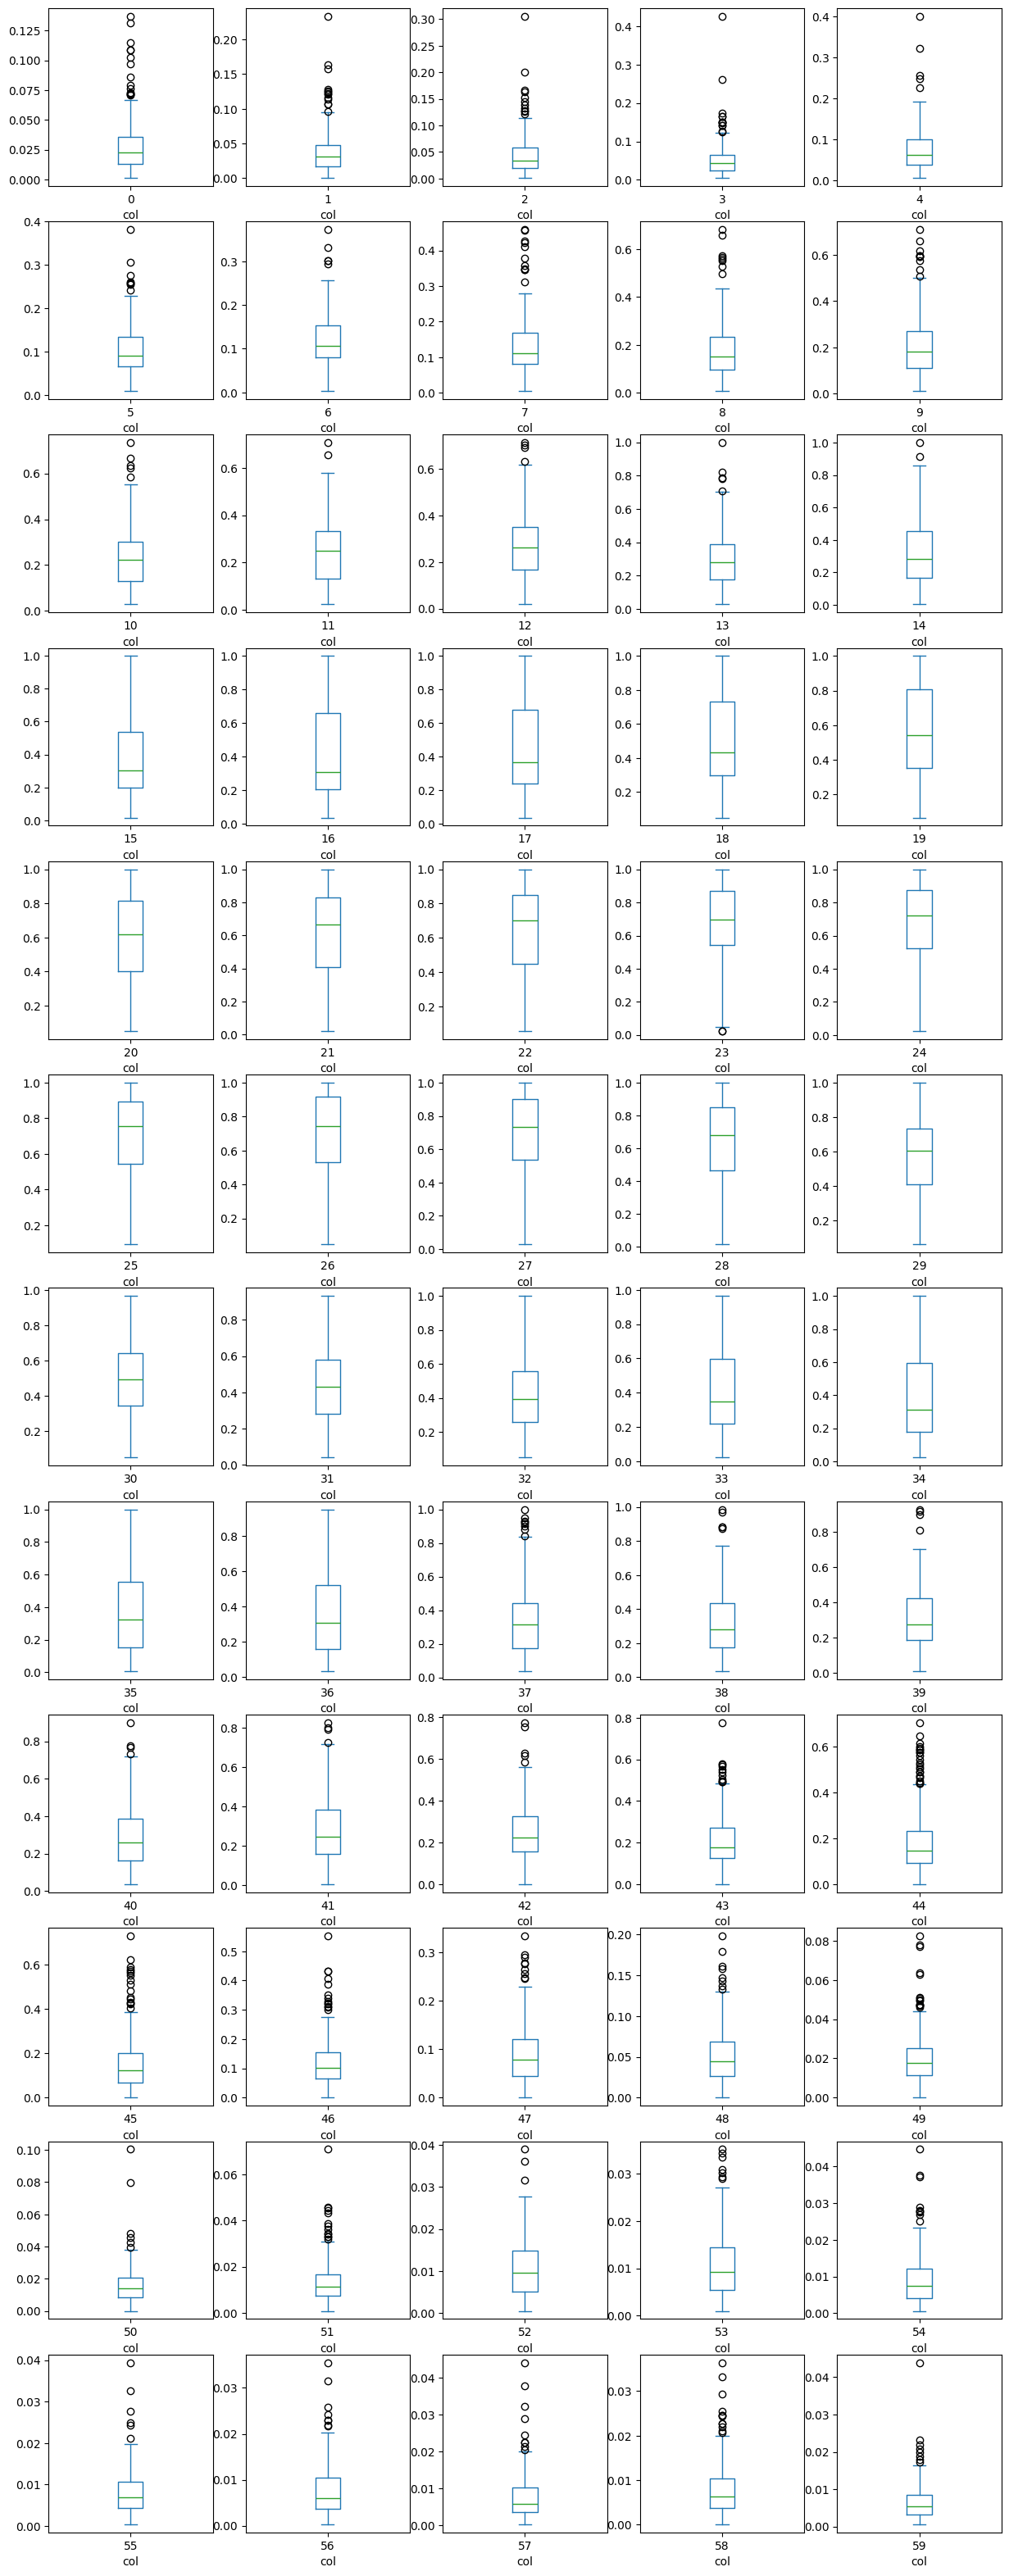

In [14]:
plt.figure(figsize=(15, 40))
for i in range(0, 60):
    plt.subplot(12, 5, i+1)
    sonar_df[i].plot(kind= 'box')
    plt.xlabel('col')

SOLVING THE OUTLIERS PROBLEM

In [15]:
nw_sonar_df= pd.DataFrame()

In [16]:
for col in range(0, 60):
    mean= sonar_df[col].mean()
    std= sonar_df[col].std()
    nw_sonar_df[col]= (sonar_df[col]-mean)/std
nw_sonar_df   

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.398590,-0.040550,-0.026861,-0.713384,0.363579,-0.101009,0.520383,0.297126,1.122563,0.021135,...,0.593850,-1.112747,-0.596166,0.679259,-0.294934,1.478069,1.759539,0.069702,0.171265,-0.657361
1,0.701845,0.420616,1.053078,0.322552,0.775804,2.600942,1.518961,2.504938,1.315152,0.587289,...,-0.297185,-0.521092,-0.256239,-0.841122,0.015466,1.896471,1.068155,-0.471269,-0.443484,-0.418842
2,-0.128918,0.599621,1.719257,1.169355,0.399581,2.088299,1.964032,2.845505,3.224987,3.058726,...,-1.063310,1.015136,0.834360,-0.197357,1.228847,2.820442,4.110246,1.306209,0.252153,0.256962
3,-0.833544,-0.647348,0.480580,-0.717683,-0.984703,-1.146598,-0.193349,-0.084543,-0.998443,-0.609000,...,0.668797,-0.137035,-1.006911,0.555985,-0.111516,-0.160672,-0.487459,-0.548551,-0.637616,1.032149
4,2.045854,0.854476,0.111059,-0.311475,-0.291661,-0.671177,-0.013702,1.314129,1.506895,1.767954,...,-0.039035,-1.071228,-0.751966,-0.060386,0.241211,-1.171811,-0.107198,-0.486726,0.446284,0.574988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.455134,-0.116400,-0.703449,-0.777861,-0.646283,0.988569,1.311800,0.406343,0.462864,0.447424,...,0.352355,-0.188934,-0.128766,1.227143,-0.845189,0.327463,-0.228190,0.548848,1.837559,1.827213
204,0.136404,-0.859727,-0.365155,0.053896,0.014358,-0.148382,-0.368141,-0.387530,-0.633539,0.053125,...,-0.913416,-0.759830,-0.199585,0.350528,-0.421916,-0.335007,-0.764013,-0.734027,-0.281708,0.038320
205,1.001964,0.159693,-0.672222,-0.530698,-0.721887,0.211991,0.063983,-0.199631,-0.440950,0.332110,...,-0.047362,0.267782,-1.106057,-0.800030,-0.436025,0.118262,1.068155,0.904344,-0.039044,-0.677238
206,0.049413,-0.095162,0.134479,0.148463,-1.053107,0.521607,0.400618,-0.264222,0.139349,0.201917,...,-0.988363,-0.500332,-0.865275,0.227254,-0.802861,-0.823142,-0.764013,-0.007580,-0.702326,-0.339335


In [17]:
sonar_df.iloc[:, -1].count()

208

In [18]:
nw_sonar_df.iloc[:, 0].count()

208

In [19]:
col_df = pd.DataFrame(nw_sonar_df.iloc[:, 0])
col_df

,0
0,-0.398590
1,0.701845
2,-0.128918
3,-0.833544
4,2.045854
...,...
203,-0.455134
204,0.136404
205,1.001964
206,0.049413


In [20]:
# col wise filtering will have problems   so we have to do row wise filtering

In [21]:
final_zscore_sonar_df= nw_sonar_df[(nw_sonar_df> -2.5).all(axis= 1) & (nw_sonar_df< 2.5).all(axis= 1)]
print(final_zscore_sonar_df)

           0         1         2         3         4         5         6   \
0   -0.398590 -0.040550 -0.026861 -0.713384  0.363579 -0.101009  0.520383   
4    2.045854  0.854476  0.111059 -0.311475 -0.291661 -0.671177 -0.013702   
6    0.110307  1.734332  2.296959  1.867859  1.659658  1.123920 -0.787317   
7    0.988915  0.496465  1.050475 -0.472669  0.730801 -0.209290 -0.308258   
8   -0.298550 -0.028414  0.118866 -0.137386 -0.189055 -0.769306 -0.751711   
..        ...       ...       ...       ...       ...       ...       ...   
203 -0.455134 -0.116400 -0.703449 -0.777861 -0.646283  0.988569  1.311800   
204  0.136404 -0.859727 -0.365155  0.053896  0.014358 -0.148382 -0.368141   
205  1.001964  0.159693 -0.672222 -0.530698 -0.721887  0.211991  0.063983   
206  0.049413 -0.095162  0.134479  0.148463 -1.053107  0.521607  0.400618   
207 -0.137617 -0.064822 -0.786721 -0.573683 -0.968502 -1.197355 -0.910318   

           7         8         9   ...        50        51        52  \
0  

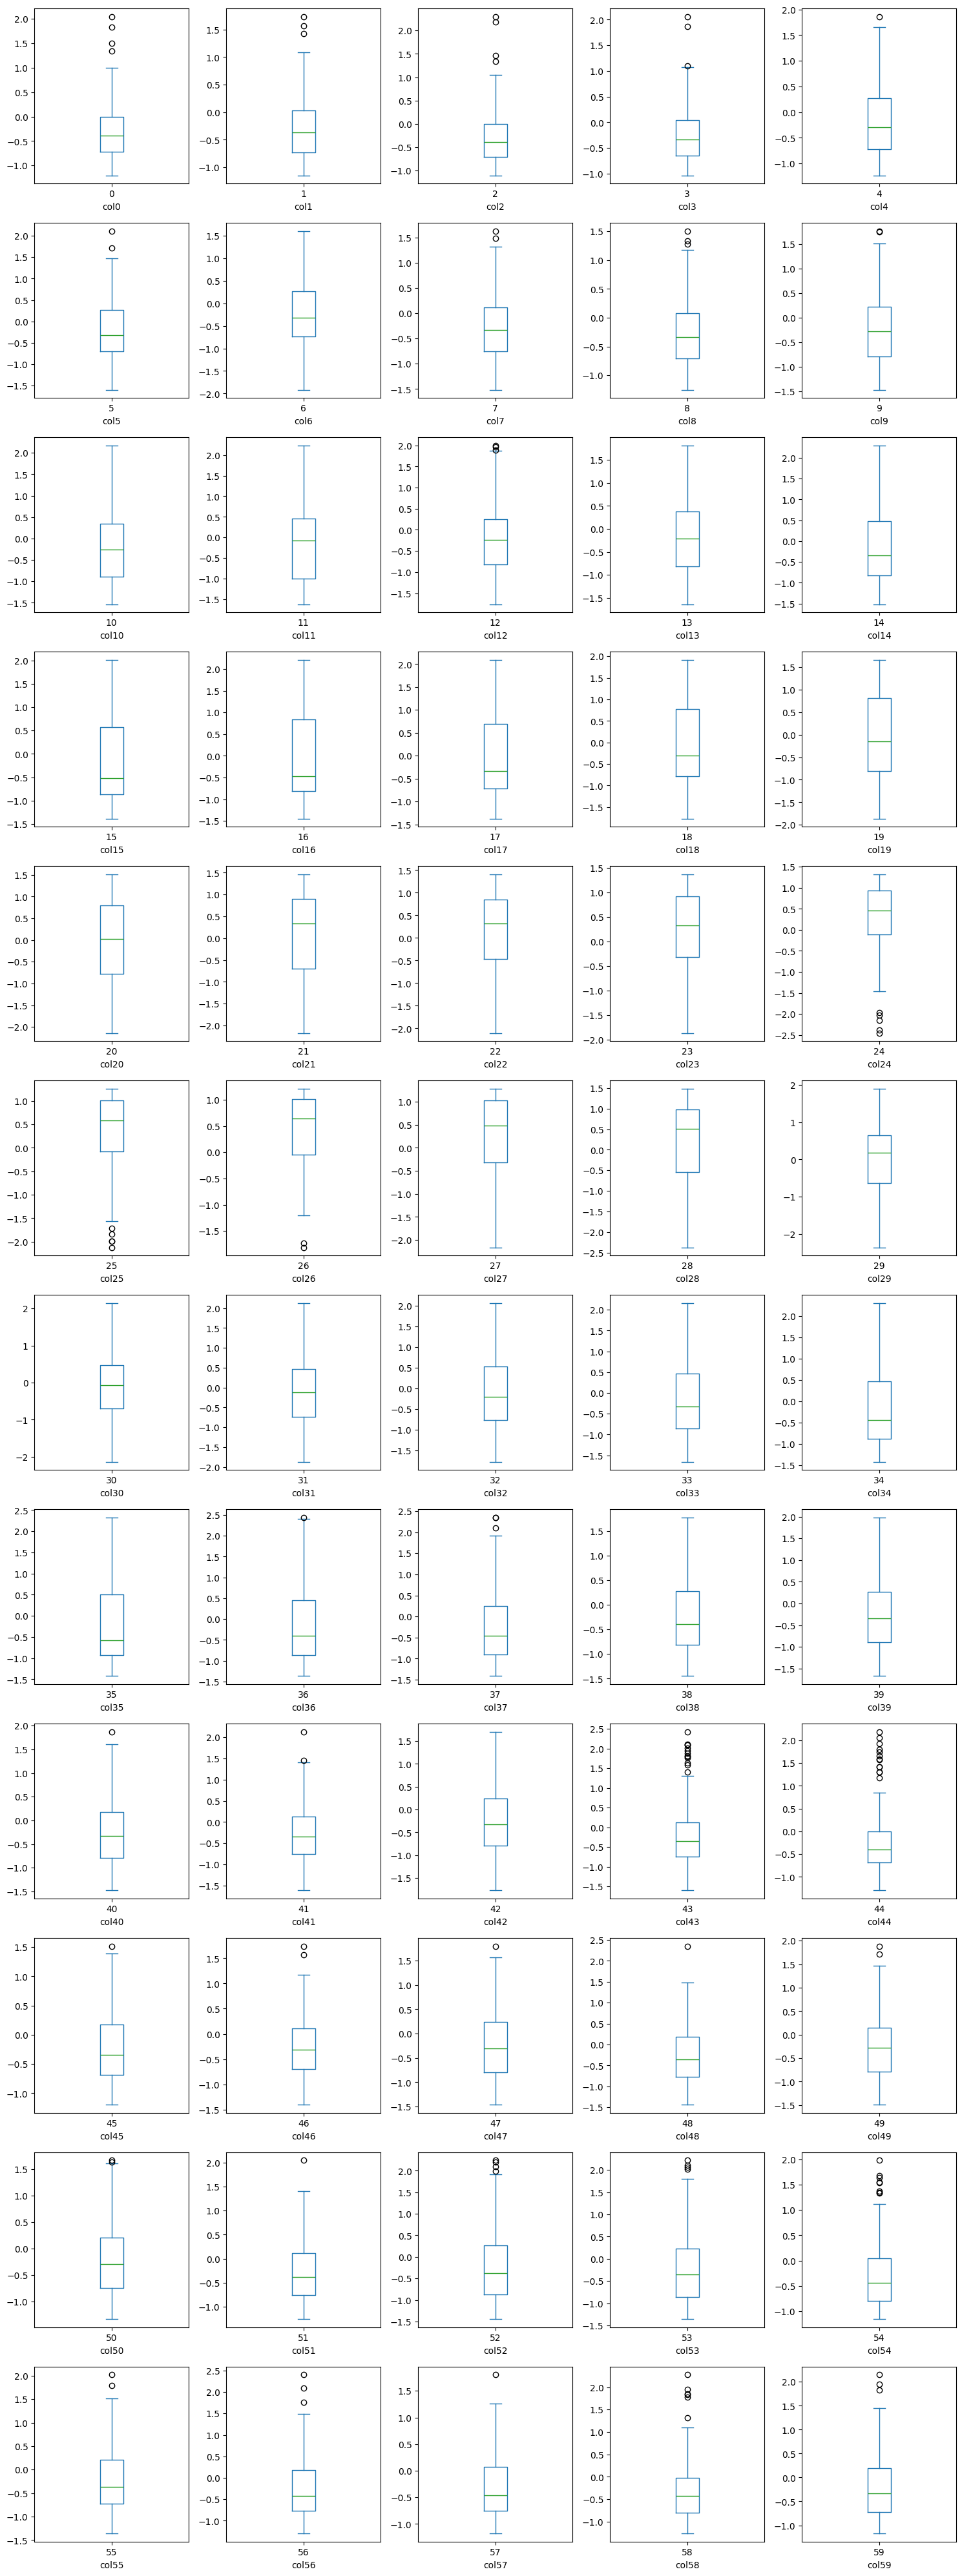

In [22]:
plt.figure(figsize=(15, 40))
for i in range(0, 60):
    plt.subplot(12, 5, i+1)
    final_zscore_sonar_df[i].plot(kind= 'box')
    plt.xlabel(f'col{i}')
plt.tight_layout()

In [23]:
merged_table= pd.merge(final_zscore_sonar_df, target_col, left_index= True, right_index= True)

In [24]:
merged_table

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.398590,-0.040550,-0.026861,-0.713384,0.363579,-0.101009,0.520383,0.297126,1.122563,0.021135,...,-1.112747,-0.596166,0.679259,-0.294934,1.478069,1.759539,0.069702,0.171265,-0.657361,0
4,2.045854,0.854476,0.111059,-0.311475,-0.291661,-0.671177,-0.013702,1.314129,1.506895,1.767954,...,-1.071228,-0.751966,-0.060386,0.241211,-1.171811,-0.107198,-0.486726,0.446284,0.574988,0
6,0.110307,1.734332,2.296959,1.867859,1.659658,1.123920,-0.787317,0.062253,0.255915,1.064168,...,0.693359,1.995778,0.295739,-0.323152,0.972500,0.238494,0.981626,-0.702326,0.753877,0
7,0.988915,0.496465,1.050475,-0.472669,0.730801,-0.209290,-0.308258,-0.863149,-0.266100,0.561994,...,-0.552232,0.182833,-0.882213,0.396411,0.257730,0.117502,-0.502182,-0.508195,-0.239953,0
8,-0.298550,-0.028414,0.118866,-0.137386,-0.189055,-0.769306,-0.751711,-1.467949,-0.925800,-0.443096,...,0.112083,0.296142,0.487499,-0.492461,-0.579074,-0.228190,0.208809,-0.330241,-0.856127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.455134,-0.116400,-0.703449,-0.777861,-0.646283,0.988569,1.311800,0.406343,0.462864,0.447424,...,-0.188934,-0.128766,1.227143,-0.845189,0.327463,-0.228190,0.548848,1.837559,1.827213,1
204,0.136404,-0.859727,-0.365155,0.053896,0.014358,-0.148382,-0.368141,-0.387530,-0.633539,0.053125,...,-0.759830,-0.199585,0.350528,-0.421916,-0.335007,-0.764013,-0.734027,-0.281708,0.038320,1
205,1.001964,0.159693,-0.672222,-0.530698,-0.721887,0.211991,0.063983,-0.199631,-0.440950,0.332110,...,0.267782,-1.106057,-0.800030,-0.436025,0.118262,1.068155,0.904344,-0.039044,-0.677238,1
206,0.049413,-0.095162,0.134479,0.148463,-1.053107,0.521607,0.400618,-0.264222,0.139349,0.201917,...,-0.500332,-0.865275,0.227254,-0.802861,-0.823142,-0.764013,-0.007580,-0.702326,-0.339335,1


APPLYING THE MODEL 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
x_train, x_test, y_train, y_test= train_test_split(merged_table.iloc[:, 0:-1], merged_table.iloc[:, -1], test_size= 0.1, random_state= 30, stratify= merged_table.iloc[:, -1])

In [27]:
print('x_train shape is', x_train.shape)
print('x_test shape is', x_test.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

x_train shape is (126, 60)
x_test shape is (14, 60)
y_train shape is (126,)
y_test shape is (14,)


In [28]:
print('counting y_train values:', y_train.value_counts())
print('counting y_test values:', y_test.value_counts())

counting y_train values: 60
0    66
1    60
Name: count, dtype: int64
counting y_test values: 60
0    7
1    7
Name: count, dtype: int64


In [29]:
lg= LogisticRegression()
lg.fit(x_train, y_train)
y_predict= lg.predict(x_test)

In [30]:
print("-----------the original target values------------------\n", y_test.head())
print("-----------the predicted target values-----------------\n", pd.DataFrame(y_predict).head())

-----------the original target values------------------
 94     0
38     0
139    1
54     0
199    1
Name: 60, dtype: int64
-----------the predicted target values-----------------
    0
0  0
1  0
2  1
3  0
4  1


In [31]:
print('the accuracy score for logistic regression is:', accuracy_score(y_test, y_predict))

the accuracy score for logistic regression is: 0.9285714285714286


In [32]:
print("*********** the classificatio report for regressio model ************\n", classification_report(y_test, y_predict))

*********** the classificatio report for regressio model ************
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.88      1.00      0.93         7

    accuracy                           0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14



Text(33.22222222222222, 0.5, 'y_train')

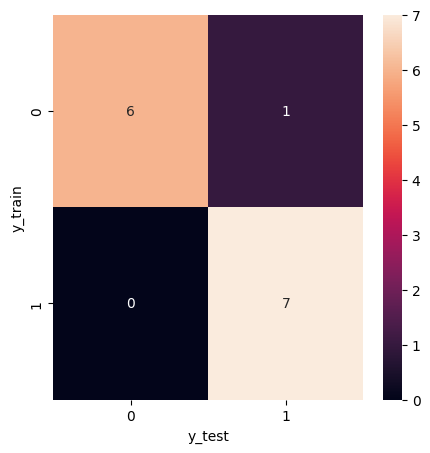

In [33]:
plt.figure(figsize= (5, 5))
cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True)
plt.xlabel('y_test')
plt.ylabel('y_train')